### Introduction to statistics
Statistics is the science of collecting, analyzing, interpreting, and presenting data. It helps us make informed decisions based on patterns, probabilities, and distributions.

In this notebook, we will explore fundamental statistical concepts that are widely used in data analysis, quality control, and probability theory.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# What are histograms?
Histograms are a type of graph. They are very useful because, in many cases, plotting every individual point in a dataset doesn't provide meaningful or useful information.

To create a histogram, we use the function `plt.hist()`.

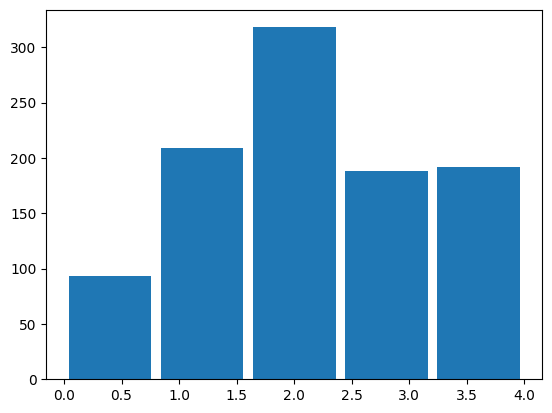

In [ ]:
#Generating data by chosing intigers from 0 to 4
data = np.random.choice([0,1,2,3,4], size = 1000, p=[0.1,0.2,0.3,0.2,0.2])

#drawing a histogram
plt.hist(data, bins=5, rwidth=0.9)
plt.show()

## Gauss distribution
This distribution, also known as the normal distribution, provides information about the probability of measuring a specific value x. It has a characteristic bell-shaped curve and appears in many different fields. It is defined by the following formula:

#$p(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{x-\mu}{\sigma}^2}$
where:
* x is value that we measured
* $\sigma$ is standard deviation (see explanation below)
* $\mu$ is mean value

In [ ]:
#creating function that will calculate value for gauss distribution
def Gaus(x,std, mean):
  return 1/(std*(2*np.pi)**0.5)*np.exp(-(x-mean)**2/(2*std**2))

## Standard deviation
Standard deviation describes how the data in a distribution is spread around the mean — in other words, which values we can expect and how frequently they occur.
#$\sigma = \sqrt{\frac{\sum(x_i-\mu)^2}{N}}$
where:
* $x_i$ are the measured values
* N is the number of measured values

In [ ]:
#function calcualting standard deviation
def standard_deviation(x):
  sigma = 0
  mean_value = np.mean(x)
  for i in range(len(x)):
    sigma += (x[i] - mean_value)**2
  return (sigma/len(x))**0.5

Let’s generate data from a normal distribution and calculate its mean value and standard deviation based on that data. Please repeat the code for sample sizes equal to 10, 100, 1000, and 1,000,000.

What can you observe?

In [ ]:
#defining number of samples to generate from distribution and values
n= 100000
mean = 0
stand_dev = 1


x = np.random.normal(mean, stand_dev, n) #creating array with points from normal distribution
df = pd.DataFrame(x, index=range(n), columns=["x"]) # creating DataFrame from an array

print("Mean value calculated from the data: ", df['x'].mean(), ". Mean value for which distribution was calculated: ", mean)
print("Standard deviation calculated from the data: ", df['x'].std(), ". Standard deviation for which distribution was calculated: ", stand_dev)

Mean value calculated from the data:  0.0014853571033129713 . Mean value for which distribution was calculated:  0
Standard deviation calculated from the data:  0.99785666668796 . Standard deviation for which distribution was calculated:  1


Now let's create histogram from data we generated and plot gauss function over it.

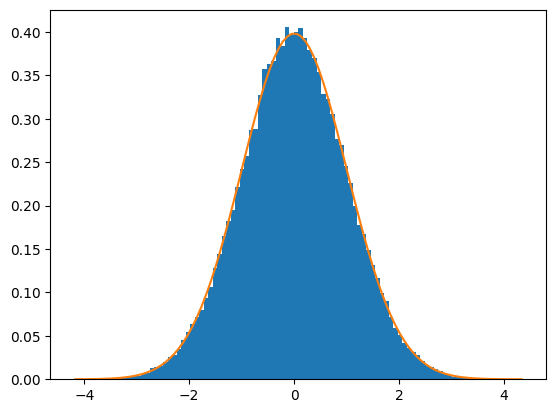

In [ ]:
#plotting histogram from collected data. density=True recalculates values of bins by dividing
#value of every bin by total number of measured values. In another worlds avery bins gives probability of
#obtaining given values
plt.hist(df["x"],bins=100,density=True)

#np.histogram in difference to plt.hist returns values and range of the bins of histogram
counts, bins = np.histogram(df["x"],bins=100,density=True)
bin_centers = 0.5*(bins[1:]+bins[:-1])

#calcualting probability of obtaining value x
values = Gaus(bin_centers,standard_deviation(df["x"]), np.mean(df["x"]))
#plotting a function from calculated values
plt.plot(bin_centers, values)
plt.show()